## Clustering Belgian Street Signs

Not very successful output... Just checking though.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import os,sys
import random
import skimage.io
from   skimage import data, transform ,color
from   sklearn.decomposition import PCA

In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(color.rgb2gray(skimage.data.imread(f)))
            labels.append(int(d))
    return images, labels

In [4]:
ROOT_PATH = "/Volumes/1TBHDD/Dropbox/Scripts-random/belgium_street_sign_classifier/"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

# Load up image and labels lists
print("Loading training images ...")
images, labels = load_data(train_data_directory)

images32 = [transform.resize(image, (32, 32), mode='constant') for image in images]


print("Labels: ",set(labels))

print("Flattinging images...")
flat_images = []
for im in images32:
    flat_images.append(im.flatten())

images32 = np.array(flat_images)
print("images array shape: ",images32.shape)

Loading training images ...
Labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
Flattinging images...
images array shape:  (4575, 1024)


In [7]:
print("setting up Principle Component Analysis...")
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(images32.data)
print("Original (num_images,dimesions):",images32.data.shape)
print("New (num_images,dimesions):",projected.shape)


setting up Principle Component Analysis...
Original (num_images,dimesions): (4575, 1024)
New (num_images,dimesions): (4575, 2)


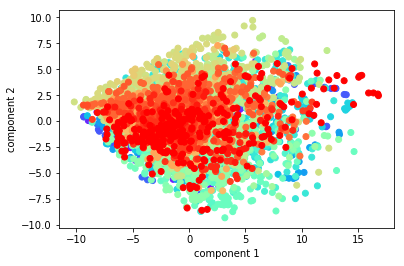

In [8]:
plt.scatter(projected[:, 0], projected[:, 1],c=labels,cmap='rainbow')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()